In [1]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2


In [6]:
pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.4 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.14.0
    Uninstalling tensorflow-2.14.0:
      Successfully

In [2]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')


In [5]:
def load_image(img_path):
  img=tf.io.read_file(img_path)
  img=tf.image.decode_image(img, channels=3)
  img=tf.image.convert_image_dtype(img, tf.float32)
  img=img[tf.newaxis,:]
  return img

In [25]:
content_image=load_image('/content/PHOTO.jpg')
style_image=load_image('/content/sea.PNG')


In [17]:
content_image.shape

TensorShape([1, 531, 413, 3])

In [26]:
style_image.shape

TensorShape([1, 585, 589, 3])

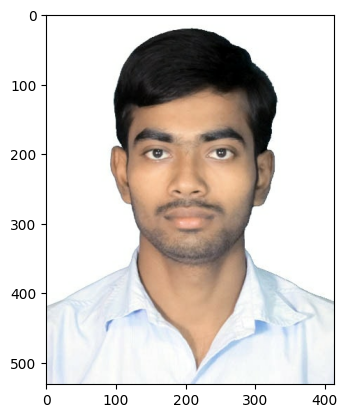

In [18]:
plt.imshow(np.squeeze(content_image))
plt.show()

In [27]:
stylized_image=model(tf.constant(content_image),tf.constant(style_image))[0]


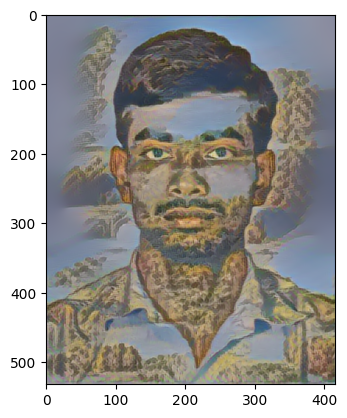

In [28]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [29]:
cv2.imwrite('generatedmyphoto.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255,cv2.COLOR_BGR2RGB))

True